In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import datetime

from sklearn.metrics import mean_squared_error # classification or regression

from statsmodels.tsa.statespace.sarimax import SARIMAX # timeseries
from statsmodels.tsa.arima.model import ARIMA

## (LSTM, RNN, GRNN), (TFT - Temporal fusion transformer)

import warnings
import statsmodels.api as sm
import matplotlib.dates as mdates
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

warnings.filterwarnings("ignore")

# time series forecast
 $$y=f(x)$$
 y - > depndent
 x - > independent
 
 design a function, output -> temperature, x-> Altitude, humidity, wind, sun position w.r.t to earth at a time
 these are time series problems -> current output is dependent on the history as well

# Pakistan stock Exchange Data


### Time Series Forecast
It is about forecasting a variable’s value in future, based on it’s own past values. For example, forecasting stock price values, revenue of a product, average temperature of a city in the coming week or month, etc.

In [4]:
df = pd.read_csv('session.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586 entries, 0 to 1585
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1586 non-null   int64  
 1   ID            1586 non-null   int64  
 2   Scrip         1586 non-null   object 
 3   Datetime      1586 non-null   object 
 4   Price         1586 non-null   float64
 5   Volume        1586 non-null   int64  
 6   Date          1586 non-null   object 
 7   Company Code  1586 non-null   object 
 8   Open_daily    1586 non-null   float64
 9   Close_daily   1586 non-null   float64
 10  LDCP          1586 non-null   float64
dtypes: float64(4), int64(3), object(4)
memory usage: 136.4+ KB


In [5]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586 entries, 0 to 1585
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            1586 non-null   int64  
 1   Scrip         1586 non-null   object 
 2   Datetime      1586 non-null   object 
 3   Price         1586 non-null   float64
 4   Volume        1586 non-null   int64  
 5   Date          1586 non-null   object 
 6   Company Code  1586 non-null   object 
 7   Open_daily    1586 non-null   float64
 8   Close_daily   1586 non-null   float64
 9   LDCP          1586 non-null   float64
dtypes: float64(4), int64(2), object(4)
memory usage: 124.0+ KB


In [3]:
df.describe()

,ID,Price,Volume,Open_daily,Close_daily,LDCP
count,1586.000000,1586.000000,1.586000e+03,1586.000000,1586.000000,1586.000000
mean,3221.500000,396.344685,4.103846e+03,394.446110,396.715038,394.796614
std,457.983078,14.390149,6.254318e+04,13.072795,14.413498,12.736334
min,2429.000000,346.000000,0.000000e+00,350.000000,346.000000,346.000000
25%,2825.250000,390.000000,1.000000e+02,390.000000,391.780000,386.060000
50%,3221.500000,397.000000,1.000000e+02,395.040000,397.860000,396.990000
75%,3617.750000,402.235000,5.000000e+02,402.000000,402.720000,400.535000
max,4014.000000,460.530000,2.324100e+06,456.140000,460.530000,463.310000


In [16]:
df.head(5)

,ID,Scrip,Datetime,Price,Volume,Date,Company Code,Open_daily,Close_daily,LDCP
Date,,,,,,,,,,
2023-01-02,2429,ABOT,2023-01-02 18:00:00,460.53,7500,2023-01-02,ABOT,456.14,460.53,463.31
2023-01-03,2430,ABOT,2023-01-03 18:00:00,450.20,10400,2023-01-03,ABOT,455.00,450.20,460.53
2023-01-04,2431,ABOT,2023-01-04 18:00:00,450.00,3350,2023-01-04,ABOT,450.00,450.00,450.20
2023-01-05,2432,ABOT,2023-01-05 18:00:00,444.69,11200,2023-01-05,ABOT,445.00,444.69,450.00
2023-01-06,2433,ABOT,2023-01-06 18:00:00,438.00,8900,2023-01-06,ABOT,444.00,438.00,444.69


In [12]:
# df['Price']

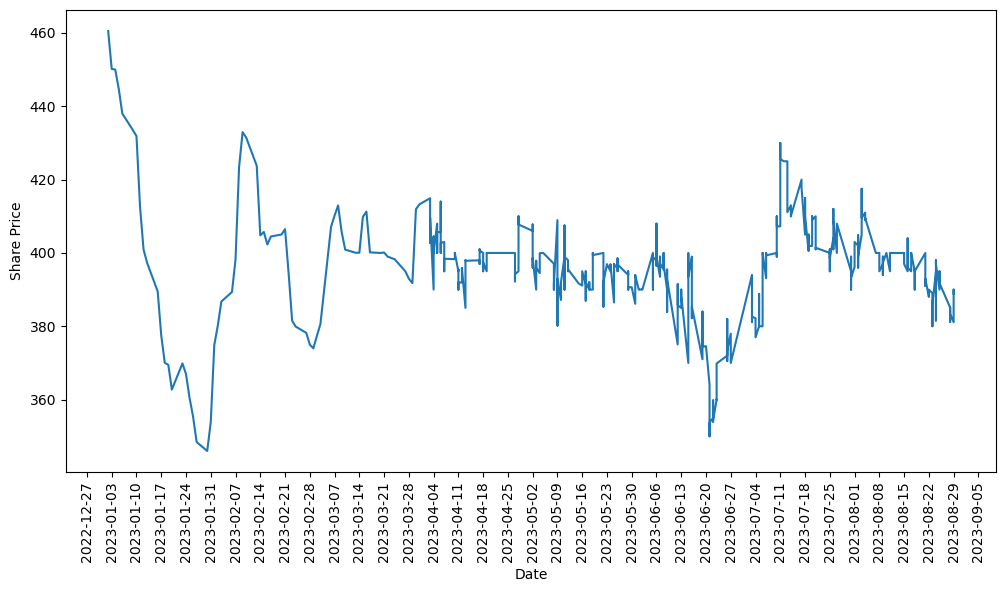

In [18]:
df.index = pd.to_datetime(df['Date'], format='%Y-%m-%d')

plt.figure(figsize=(12,6))
plt.plot(df.index, df.Price)
plt.ylabel('Share Price')
plt.xlabel('Date')
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
plt.xticks(rotation=90)
plt.show()

## Do you think this time series is stationary?
- A time series is stationary if it satisfies the following three conditions.
    1. Mean of the series over time is constant
    2. Variance of the series over time is constant.
    3. No seasonality.
- Classic Time series modelling techniques like AR(Auto Regression), MA(Moving Average), ARMA (AR + MA) etc., won’t work if there is no stationarity in the time series. 
- Let us Verify through plots

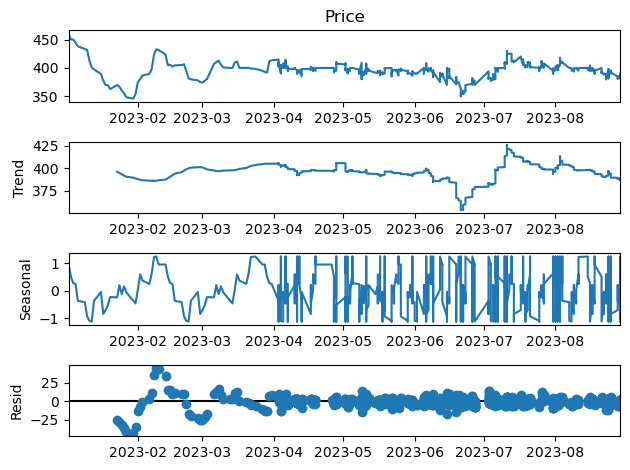

In [6]:
sm.tsa.seasonal_decompose(df.Price,period=30).plot();

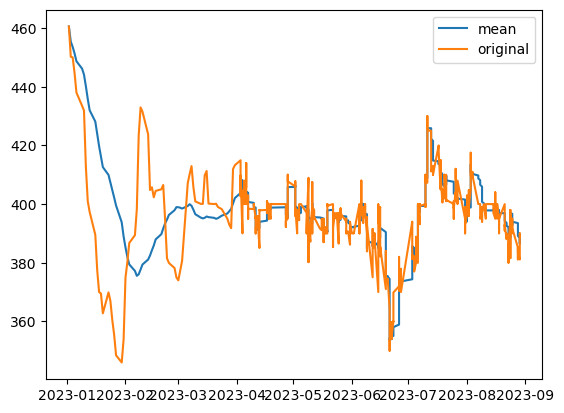

In [7]:
df['mean_Price']=df.Price.rolling(window=20, min_periods=1).mean()
plt.plot(df.mean_Price, label='mean')
plt.plot(df.Price, label='original')
plt.legend()

y_t = 

# AR- Auto Regressive
- This forecasting method assumes that the value at any time step t can be calculated as a regression involving the values of the same series in one or more previous time steps (this is referred as Auto — i.e. previous values of it’s own ). The number of these time steps is referred as AR lags ( denoted by p parameter ).
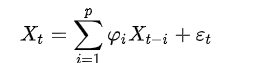

# MA- Moving Average
- This forecasting method assumes that the value at any time step t can be calculated as a regression involving the errors (in forecast) seen for previous time steps. The number of these time steps is referred as MA lags (denoted by q parameter ).
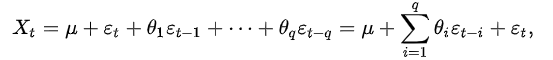

# I- Integrated
- Differencing is done for removing the trend and to achieve stationarity. The order of differencing is given by parameter d. In our case, d=1 as we do first difference.

# ACF and PACF Analysis
- For determining p and q, we need to plot PACF (Partial Auto Correlation Function ) and ACF ( Auto Correlation Function) respectively,

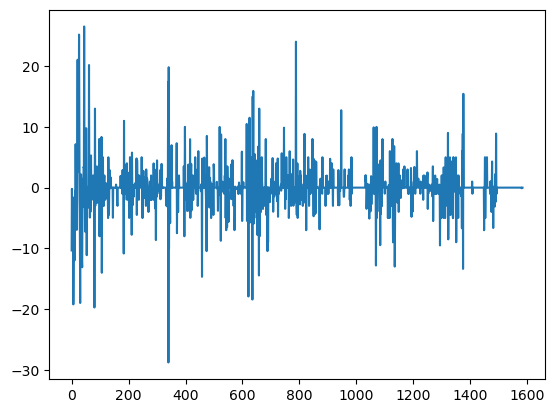

In [8]:
diff=df.Price[1::].values-df.Price[0:df.shape[0]-1:].values
plt.plot(diff)

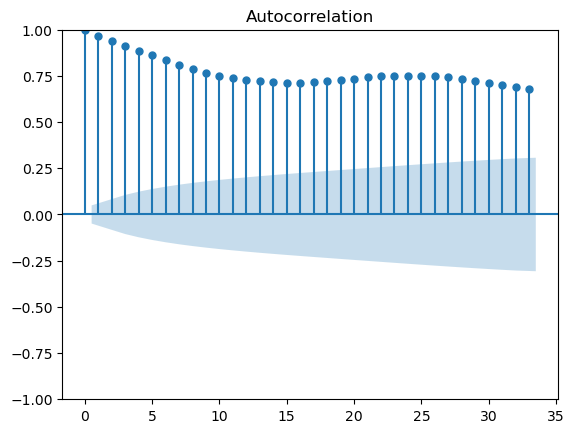

In [9]:
plot_acf(df.Price);

# correlation changes slowly w.r.t lags -> non-stationary

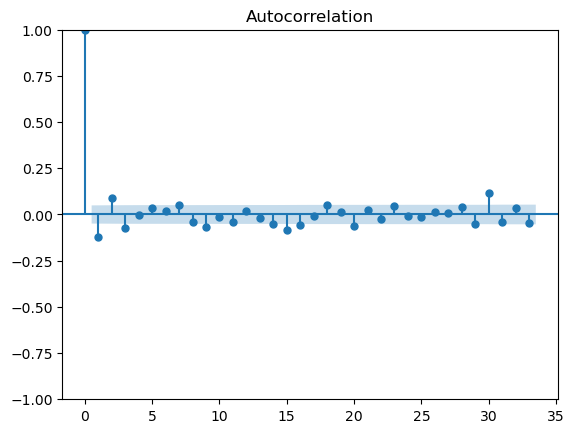

In [10]:
plot_acf(pd.Series(list(diff)));

# correlation over lags close to zero -> series is stationary

- From ACF it appears lags 1 (t-1) and 2 (t-2) are significant for MA (q parameter).

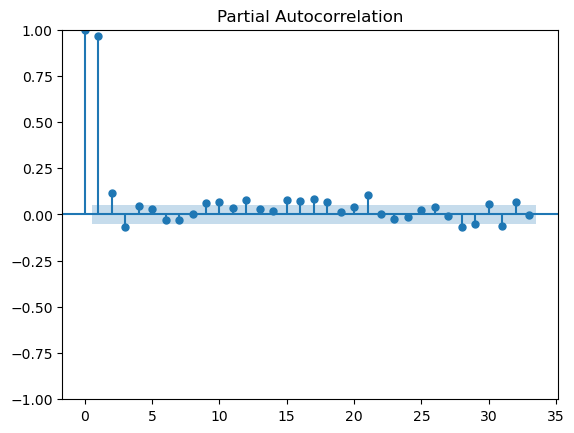

In [11]:
pacf_plot=plot_pacf(df.Price)

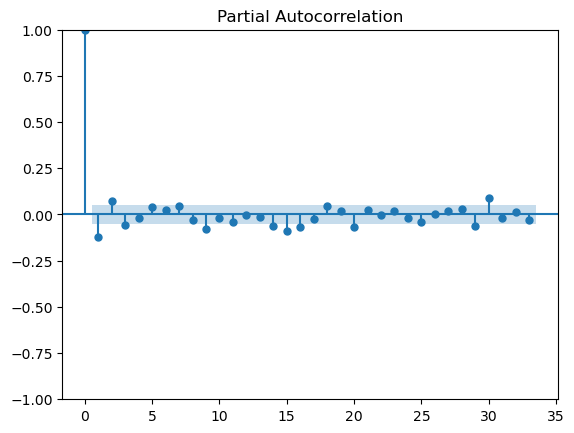

In [12]:
pacf_plot=plot_pacf(pd.Series(diff))

- From PACF it appears lags 1 (t-1) and 2 (t-2) are significant for AR (p parameter). 

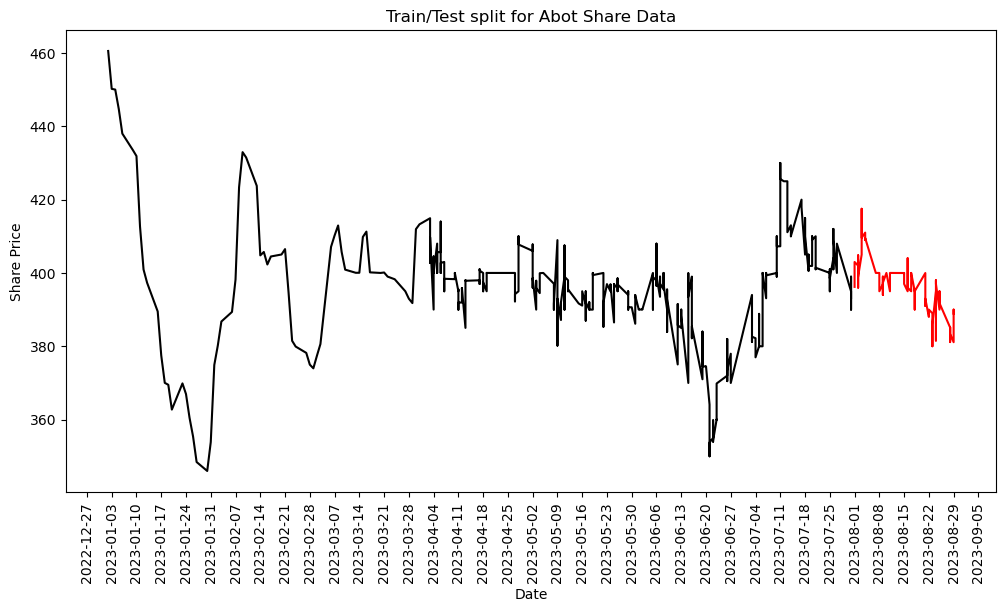

In [21]:
# split data into train and test sets
train = df[df.index < pd.to_datetime("2023-08-01", format='%Y-%m-%d')]
test = df[df.index >= pd.to_datetime("2023-08-01", format='%Y-%m-%d')]

plt.figure(figsize=(12,6))
plt.plot(train.Price, color = "black")
plt.plot(test.Price, color = "red")
plt.ylabel('Share Price')
plt.xlabel('Date')
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
plt.xticks(rotation=90)
plt.title("Train/Test split for Abot Share Data")
plt.show()

In [22]:
#performance metric
def smape(y_t, y_p):
    return 100/len(y_t) * np.sum(2 * np.abs(y_p - y_t) / (np.abs(y_t) + np.abs(y_p)))


In [23]:
ARMAmodel = SARIMAX(train.Price, order = (1, 0, 1), )
ARMAmodel = ARMAmodel.fit()

y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.95) 

y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1], )
y_pred_df.index = test.index
y_pred_out_arma = y_pred_df["Predictions"] 
arma_rmse = np.sqrt(mean_squared_error(test["Price"].values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)
print("SMAPE: ", smape(test["Price"].values, y_pred_df["Predictions"]))


RMSE:  9.643430337264226
SMAPE:  1.803537191965381


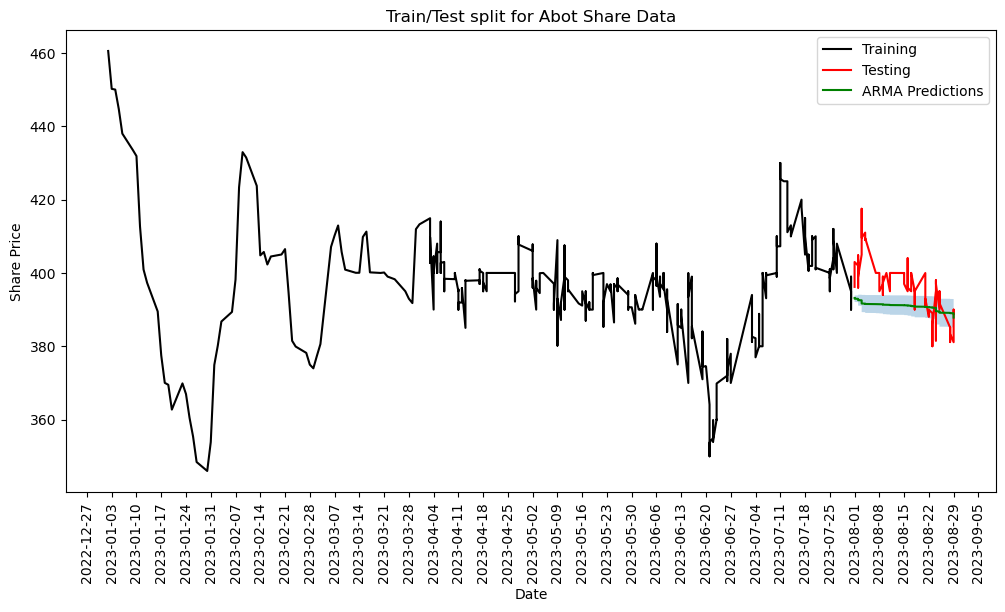

In [24]:
plt.figure(figsize=(12,6))
plt.plot(train.Price, color = "black", label='Training')
plt.plot(test.Price, color = "red", label='Testing')
plt.plot(y_pred_out_arma, color='green', label = 'ARMA Predictions')
plt.fill_between(test.index, y_pred_df['lower Price'], y_pred_df['upper Price'],  alpha=0.3)
plt.legend()
plt.ylabel('Share Price')
plt.xlabel('Date')
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
plt.xticks(rotation=90)
plt.title("Train/Test split for Abot Share Data")
plt.show()


In [27]:

ARIMAmodel = ARIMA(train.Price, exog=train[['Open_daily', 'LDCP']], order = (2, 1, 2))
ARIMAmodel = ARIMAmodel.fit()

y_pred = ARIMAmodel.get_forecast(len(test.index), exog=test[['Open_daily',  'LDCP']])
y_pred_df = y_pred.conf_int(alpha = 0.95) 
y_pred_df["Predictions"] = ARIMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1],
                                             exog= test[['Open_daily', 'LDCP']])
y_pred_df.index = test.index
y_pred_out_arima = y_pred_df["Predictions"] 
arima_rmse = np.sqrt(mean_squared_error(test["Price"].values, y_pred_df["Predictions"]))
print("RMSE: ",arima_rmse)
print("SMAPE: ", smape(test["Price"].values, y_pred_df["Predictions"]))


RMSE:  5.9342846545487316
SMAPE:  1.1461087877873832


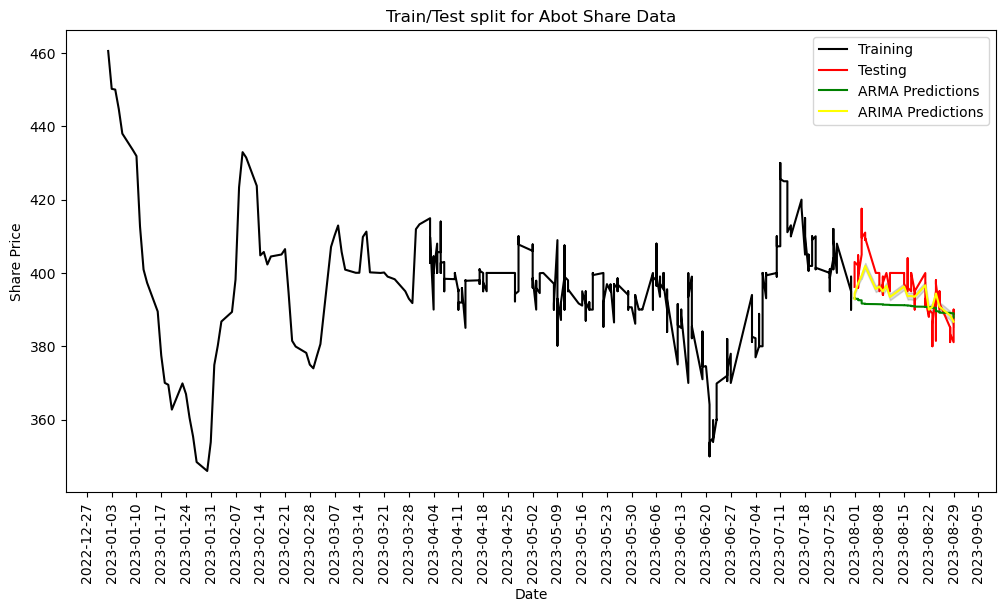

In [28]:
plt.figure(figsize=(12,6))
plt.plot(train.Price, color = "black", label='Training')
plt.plot(test.Price, color = "red", label='Testing')
plt.plot(y_pred_out_arma, color='green', label = 'ARMA Predictions')
plt.plot(y_pred_out_arima, color='Yellow', label = 'ARIMA Predictions')
plt.fill_between(test.index, y_pred_df['lower Price'], y_pred_df['upper Price'], color='gray', alpha=0.3)
plt.legend()
plt.ylabel('Share Price')
plt.xlabel('Date')
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
plt.xticks(rotation=90)
plt.title("Train/Test split for Abot Share Data")
plt.show()


#  Seasonality
- The algorithm takes in to consideration the seasonality of the time series via some parameters we feed it (P,D,Q,m).
- The parameters (P,D,Q) are seasonal counterparts of p,q and d.
- ‘m’ is the number of time steps in which there is a repetition of seasonality ( for example, 12 months if one time step is one month and seasonal pattern repeats in duration of one year ). P is the seasonal AR lag, Q is seasonal MA lag, D is seasonal difference order.

In [35]:
SARIMAXmodel = SARIMAX(train.Price,exog=train[['Open_daily',  'LDCP']], order = (2, 1, 2), 
                       seasonal_order=(2,1,2,4))
SARIMAXmodel = SARIMAXmodel.fit()

y_pred = SARIMAXmodel.get_forecast(len(test.index), exog=test[['Open_daily',  'LDCP']])
y_pred_df = y_pred.conf_int(alpha = 0.9) 
y_pred_df["Predictions"] = SARIMAXmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1], 
                                                exog=test[['Open_daily', 'LDCP']])
y_pred_df.index = test.index
y_pred_out_sarima = y_pred_df["Predictions"] 
sarima_rmse = np.sqrt(mean_squared_error(test["Price"].values, y_pred_df["Predictions"]))
print("RMSE: ",sarima_rmse)
print("SMAPE: ", smape(test["Price"].values, y_pred_df["Predictions"]))

RMSE:  8.144110489171336
SMAPE:  1.847602433031651


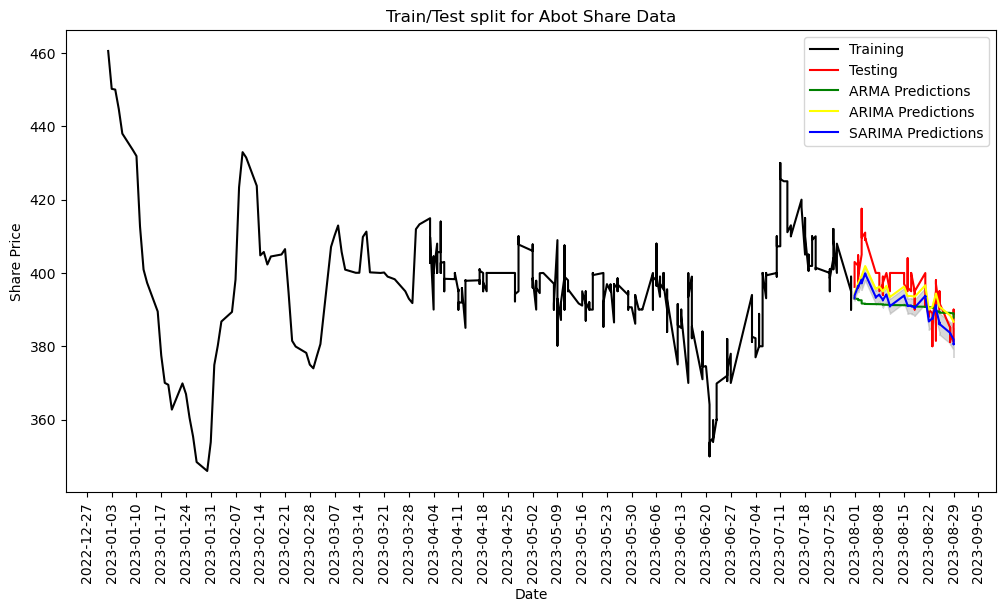

In [36]:
plt.figure(figsize=(12,6))
plt.plot(train.Price, color = "black", label='Training')
plt.plot(test.Price, color = "red", label='Testing')
plt.plot(y_pred_out_arma, color='green', label = 'ARMA Predictions')
plt.plot(y_pred_out_arima, color='Yellow', label = 'ARIMA Predictions')
plt.plot(y_pred_out_sarima, color='Blue', label = 'SARIMA Predictions')
plt.fill_between(test.index, y_pred_df['lower Price'], y_pred_df['upper Price'], color='gray', alpha=0.3)
plt.legend()
plt.ylabel('Share Price')
plt.xlabel('Date')
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
plt.xticks(rotation=90)
plt.title("Train/Test split for Abot Share Data")
plt.show()
